# SMS SPAM DETECTION 

## Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import LabelBinarizer



### Load Data

In [2]:
data = pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
data = data.iloc[:,0:2]

In [5]:
data.rename(columns={'v1':'target','v2':'text'},inplace=True)

### Encode target variable

In [6]:
encoder = LabelBinarizer()
data['target'] = encoder.fit_transform(data['target'])

In [7]:
data  # 0 - not spam
      # 1 - spam

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


### Checking Null values

In [8]:
data.isnull().sum()

target    0
text      0
dtype: int64

### Droping duplicate columns

In [9]:
data.duplicated().sum()
data = data.drop_duplicates(keep='first')

# EDA

In [10]:
data.shape

(5169, 2)

In [11]:
data['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [12]:
data['num_character'] = data['text'].apply(len)

C:\Users\TEJAS\AppData\Local\Temp\ipykernel_19252\3020132018.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_character'] = data['text'].apply(len)


In [13]:
import nltk
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

### Feature Engineering

In [14]:
data['words'] = data['text'].apply(lambda x:nltk.word_tokenize(x))

C:\Users\TEJAS\AppData\Local\Temp\ipykernel_19252\2657276048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['words'] = data['text'].apply(lambda x:nltk.word_tokenize(x))


In [15]:
data

,target,text,num_character,words
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail..."
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,..."
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,"[This, is, the, 2nd, time, we, have, tried, 2,..."
5568,0,Will Ì_ b going to esplanade fr home?,37,"[Will, Ì_, b, going, to, esplanade, fr, home, ?]"
5569,0,"Pity, * was in mood for that. So...any other s...",57,"[Pity, ,, *, was, in, mood, for, that, ., So, ..."
5570,0,The guy did some bitching but I acted like i'd...,125,"[The, guy, did, some, bitching, but, I, acted,..."


In [16]:
data['words_count'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\TEJAS\AppData\Local\Temp\ipykernel_19252\908700446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['words_count'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [17]:
data.drop(columns=['words'],inplace= True)

C:\Users\TEJAS\AppData\Local\Temp\ipykernel_19252\3773745467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['words'],inplace= True)


In [18]:
data

,target,text,num_character,words_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [19]:
data['num_sentences'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\TEJAS\AppData\Local\Temp\ipykernel_19252\1299526392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_sentences'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [20]:
data[['num_character','words_count','num_sentences']].describe()

,num_character,words_count,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


### Removing Punctuations

In [21]:
import string
exclude = string.punctuation

def remove_puc(text):
  return text.translate(str.maketrans('', '', exclude))

In [22]:
data['text'] = data['text'].apply(remove_puc)

C:\Users\TEJAS\AppData\Local\Temp\ipykernel_19252\300183469.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply(remove_puc)


### Removing Stopwords

In [23]:
from nltk.corpus import stopwords
def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))  # Load stopwords only once
  return ' '.join(word for word in text.split() if word not in stop_words)

In [24]:
data['text'].apply(remove_stopwords)

0       Go jurong point crazy Available bugis n great ...
1                                 Ok lar Joking wif u oni
2       Free entry 2 wkly comp win FA Cup final tkts 2...
3                     U dun say early hor U c already say
4           Nah I dont think goes usf lives around though
                              ...                        
5567    This 2nd time tried 2 contact u U å£750 Pound ...
5568                     Will Ì b going esplanade fr home
5569                          Pity mood Soany suggestions
5570    The guy bitching I acted like id interested bu...
5571                                   Rofl Its true name
Name: text, Length: 5169, dtype: object

In [25]:
from nltk.tokenize import word_tokenize, sent_tokenize
data['text'].apply(word_tokenize)

0       [Go, until, jurong, point, crazy, Available, o...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, U, c, already, t...
4       [Nah, I, dont, think, he, goes, to, usf, he, l...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568         [Will, Ì, b, going, to, esplanade, fr, home]
5569    [Pity, was, in, mood, for, that, Soany, other,...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                     [Rofl, Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

# Word Stemming

### Stemming is a processs in which we convert the word into it's  main form or morph

In [26]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def stem_words(text):
  if isinstance(text, list):
    text = " ".join(text)
  return " ".join([ps.stem(word) for word in text.split()])

In [27]:
data['text'].apply(stem_words)

0       go until jurong point crazi avail onli in bugi...
1                                   ok lar joke wif u oni
2       free entri in 2 a wkli comp to win fa cup fina...
3             u dun say so earli hor u c alreadi then say
4       nah i dont think he goe to usf he live around ...
                              ...                        
5567    thi is the 2nd time we have tri 2 contact u u ...
5568                      will ì b go to esplanad fr home
5569         piti wa in mood for that soani other suggest
5570    the guy did some bitch but i act like id be in...
5571                              rofl it true to it name
Name: text, Length: 5169, dtype: object

In [28]:
data

,target,text,num_character,words_count,num_sentences
0,0,Go until jurong point crazy Available only in ...,111,24,2
1,0,Ok lar Joking wif u oni,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor U c already then say,49,13,1
4,0,Nah I dont think he goes to usf he lives aroun...,61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì b going to esplanade fr home,37,9,1
5569,0,Pity was in mood for that Soany other suggest...,57,15,2
5570,0,The guy did some bitching but I acted like id ...,125,27,1


# Vectorization of words

### converting words to Vectors

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
tfidf = TfidfVectorizer()

In [31]:
X = tfidf.fit_transform(data['text']).toarray()
y = data['target'].values

# Scalling the values 

In [32]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X = mms.fit_transform(X)

In [33]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

# ExtraTreesClassifier Algorithm

In [34]:
from sklearn.ensemble import ExtraTreesClassifier


etc = ExtraTreesClassifier()
etc.fit(X_train,y_train)

ExtraTreesClassifier()

In [35]:
y_pred = etc.predict(X_test)


In [36]:
accuracy_etc = accuracy_score(y_pred,y_test)

In [37]:
accuracy_etc


0.9661508704061895

# Classification Report

In [43]:
etc_classification_report = classification_report(y_pred,y_test)

In [45]:
print(etc_classification_report)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       929
           1       0.75      1.00      0.86       105

    accuracy                           0.97      1034
   macro avg       0.88      0.98      0.92      1034
weighted avg       0.97      0.97      0.97      1034



# Confusion Matrix

In [54]:
ClassNames = ['not spam','spam']

NameError: name 'plt' is not defined

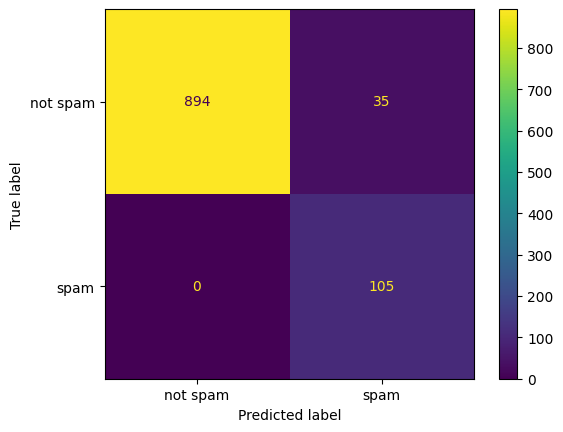

In [55]:
etc_confusion_matrix = confusion_matrix(y_pred,y_test)

disp = ConfusionMatrixDisplay(confusion_matrix=etc_confusion_matrix,display_labels=ClassNames)
disp.plot()
plt.show()